<a href="https://colab.research.google.com/github/revantj/mobile_price_classification/blob/main/mobile_price_classificationfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## The dataset I choosed is Mobile Price Classification and its is from kaggle

### Outline

- <b> Read Dataset </b>
- <b> Data Cleaning </b>
    - Outliers
    - Uncorrelated columns
    - Filling null values
    
- <b> Data Visulaization
prforming univariate ,bivariate,and 
multivariate analysis </b>
 






In [ ]:
#importing libraries 


## 1. Read Dataset

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train.csv") 
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# check information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
print(df.isnull().any())

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# checking duplicated values 
df[df.duplicated(keep=False)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## 2. Data Cleaning
- Outliers
- Uncorrelated columns
- Filling null values

### 2.1 Outliers

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


We can see almost all the features are perfect.

<Figure size 864x720 with 0 Axes>

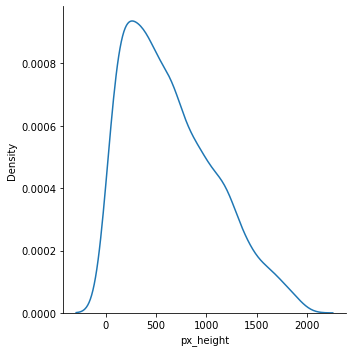

In [ ]:
plt.figure(figsize = (12,10));
sns.displot(x = df['px_height'], kind= 'kde');

There is no such outliers, it seems

.

###  2.2 Uncorrelated Columns

.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
corr = df.corr()

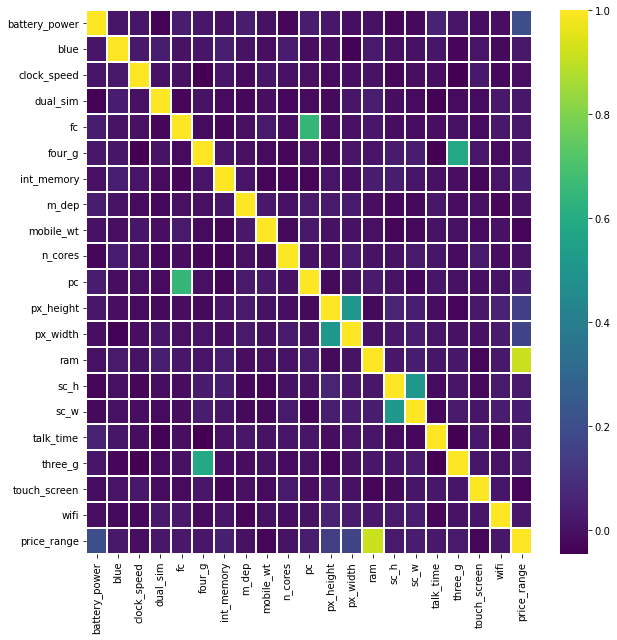

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, ax = ax, cmap = 'viridis',linewidth = 0.1);

From the above figure, we can observe that, 
- <b> ram </b> has higher correlation with <b>  price_range   </b> which is obviously true. 
- <b>   pc_width  </b> & <b>  pc_height   </b> is also correlated with price_range, surprisingly.
- <b>    battery_power </b> 
- However, <b> four_g </b>, <b> touch_screen </b> and <b> int_memory </b> has lower correlation.

In [ ]:
df['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

### 2.3 Filling null values

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

As we can see there are no null values

## 3. Data Visualization


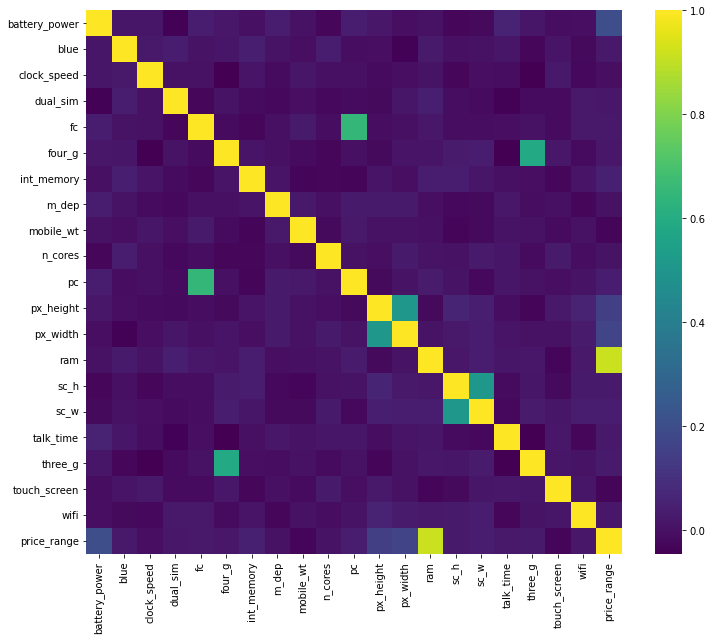

In [ ]:
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(corr, ax = ax, cmap = 'viridis');


- <b>  price_range   </b>
- <b>  ram   </b>
- <b>  battery_power   </b>
- <b> touch_screen </b>
- <b>    four_g </b>
- <b>   three_g  </b>
- <b>   px_height  </b>
- <b> px_weight </b>
- <b> wifi </b>

Checking on these features

In [ ]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

### Ram

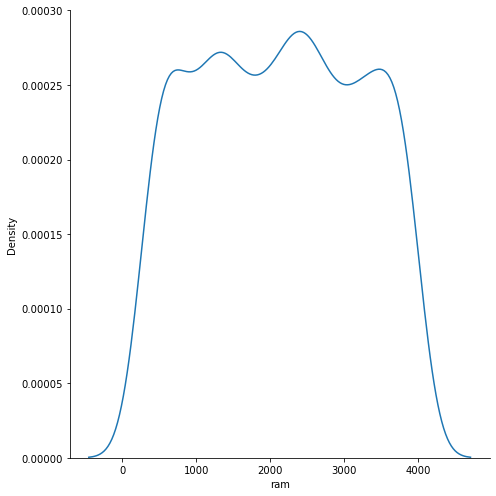

In [ ]:
sns.displot( x = 'ram', data = df, kind = 'kde', height = 7, aspect = 1);

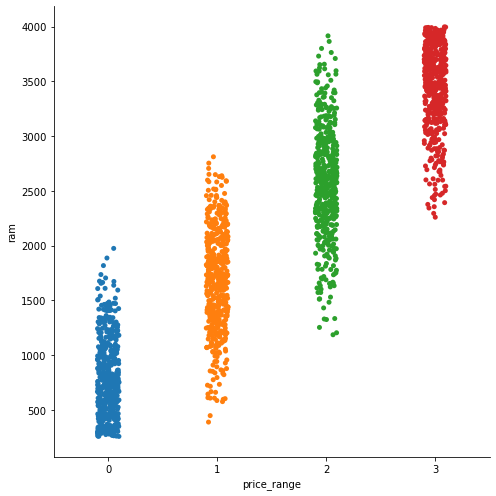

In [ ]:
sns.catplot(y = 'ram',x = 'price_range',data = df, height = 7, aspect = 1);

Offcourse, lower the ram lower the price. Higher the ram higher the price.

### battery_power

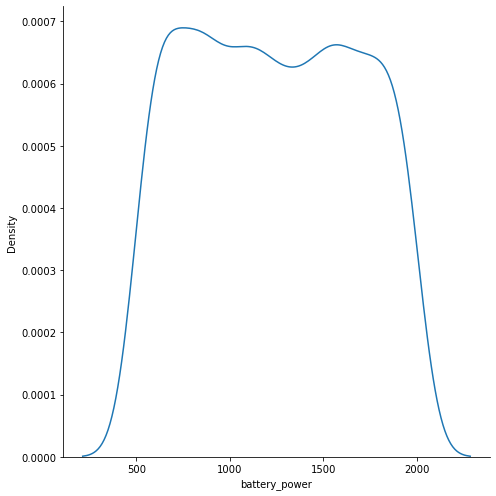

In [ ]:
sns.displot(x = 'battery_power', data = df, kind = 'kde', height = 7, aspect = 1);

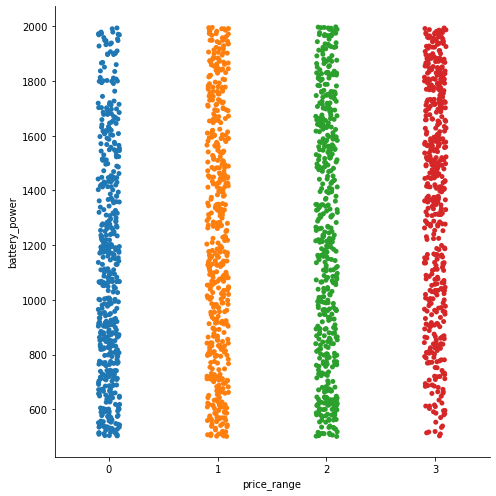

In [ ]:
sns.catplot(y = 'battery_power', x = 'price_range', data = df, aspect = 1, height = 7);

From the figure, we can say that:
- The <b> blue plots i.e or lower price range </b> has more number of data distributed on <b> battery_power 600-1000 </b> 
- Whereas, <b> the red points or higher price range </b> has more datas distributed on <b> battery_power 1400-2000 </b>

### touch_screen

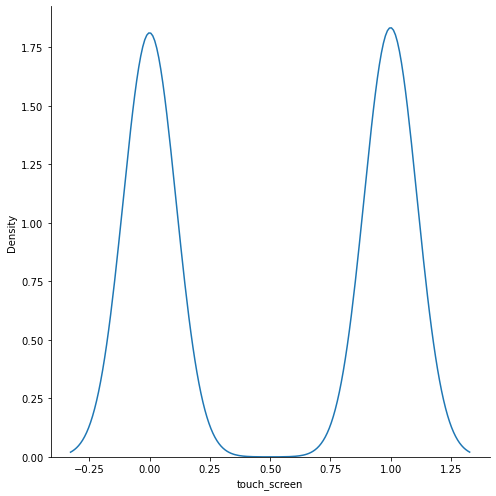

In [ ]:
sns.displot(df['touch_screen'], kind = 'kde', aspect = 1, height = 7);

In [ ]:
df['touch_screen'].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

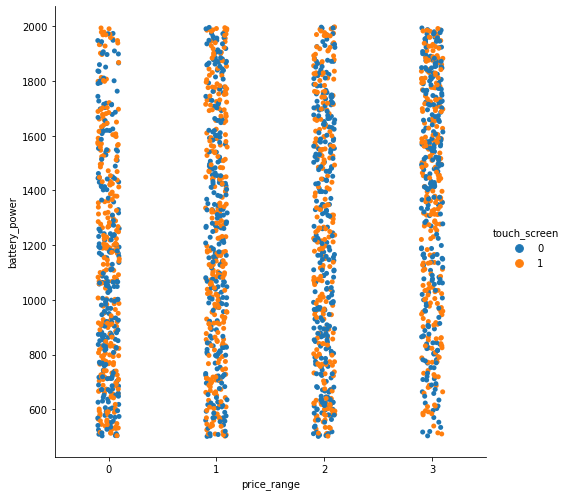

In [ ]:
sns.catplot(y = 'battery_power', x = 'price_range', hue = 'touch_screen', data = df, aspect = 1, height = 7);

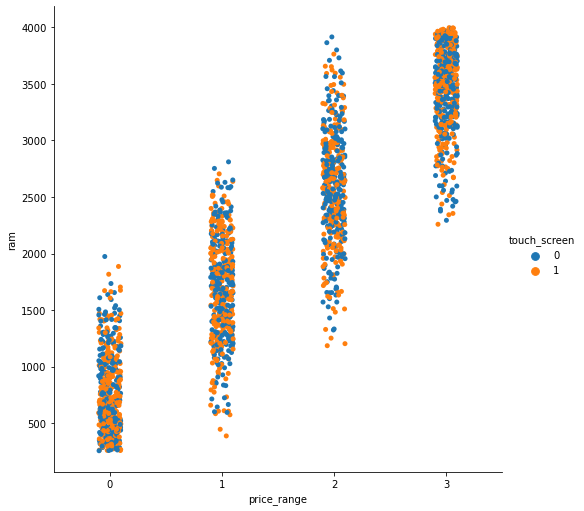

In [ ]:
sns.catplot(y = 'ram',x = 'price_range', hue = 'touch_screen',data = df_train, height = 7, aspect = 1);

<b> touch_screen </b> is equally distributed on all price range. We don't see anything here.

### four_g

In [ ]:
df['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

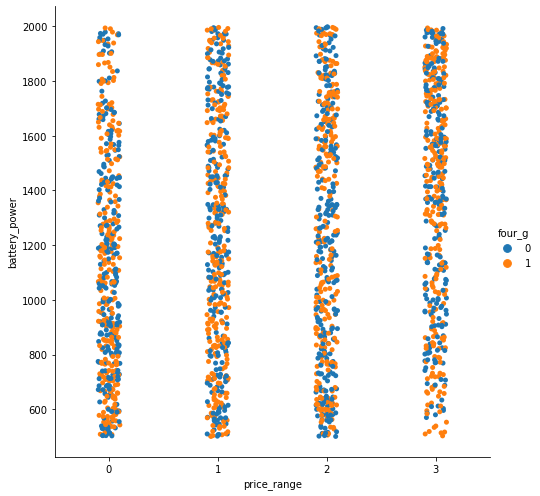

In [ ]:
sns.catplot(y = 'battery_power', x = 'price_range', hue = 'four_g', data = df, aspect = 1, height = 7);

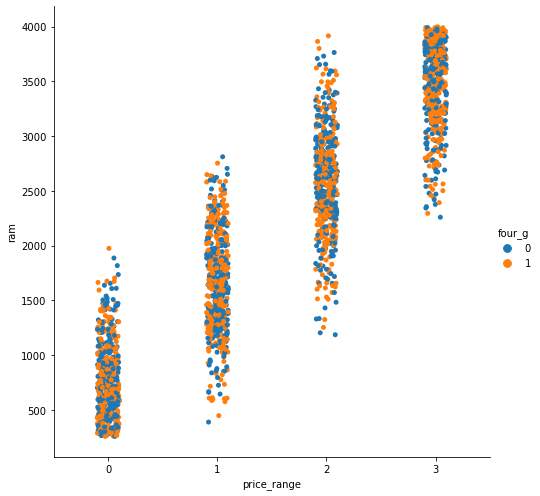

In [ ]:
sns.catplot(y = 'ram',x = 'price_range', hue = 'four_g',data = df, height = 7, aspect = 1);

In [ ]:
labels = ["4G-supported", "Not supported"]
values = df['four_g'].value_counts().values

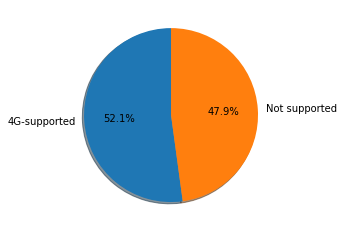

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.show()

### three_g

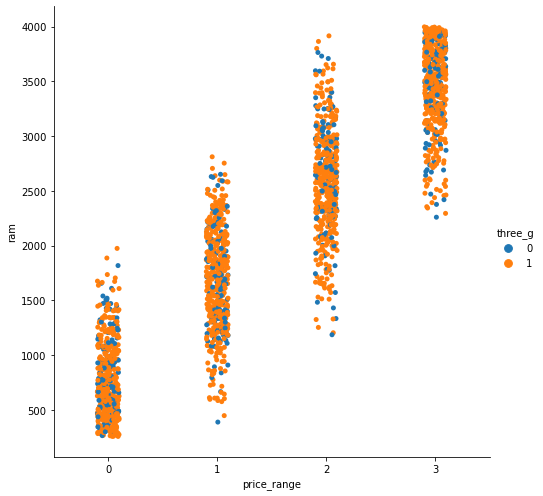

In [ ]:
sns.catplot(y = 'ram',x = 'price_range', hue = 'three_g',data = df, height = 7, aspect = 1);

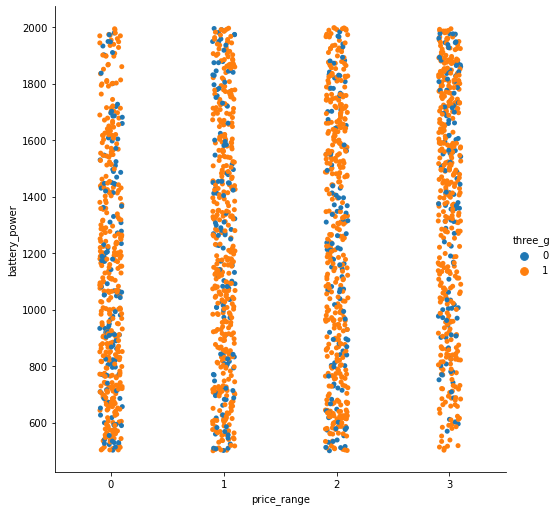

In [ ]:
sns.catplot(y = 'battery_power', x = 'price_range', hue = 'three_g', data = df_train, aspect = 1, height = 7);

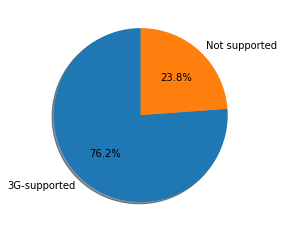

In [ ]:
labels3g = ["3G-supported","Not supported"]
values3g = df['three_g'].value_counts().values
fig1,ax1 = plt.subplots()
ax1.pie(values3g, labels = labels3g, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.show()

### px_height and px_weight

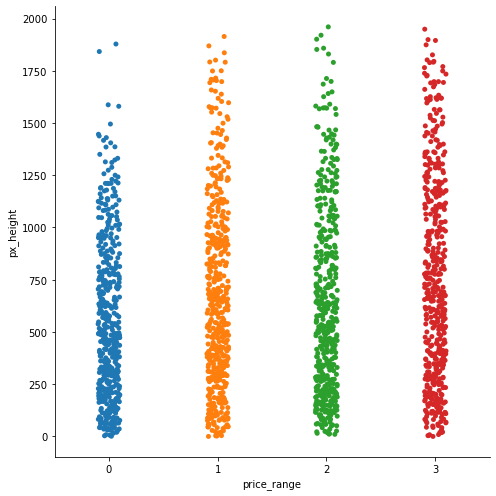

In [ ]:
sns.catplot(x = 'price_range', y = 'px_height', data = df, aspect = 1, height = 7);

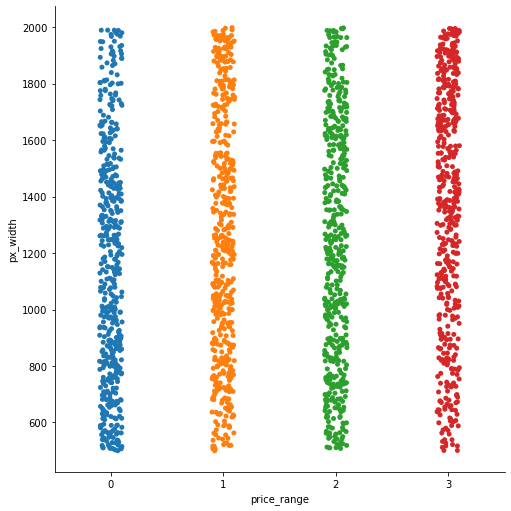

In [ ]:
sns.catplot(x = 'price_range', y = 'px_width', data = df_train, aspect = 1, height = 7);

### fc (front_camera)

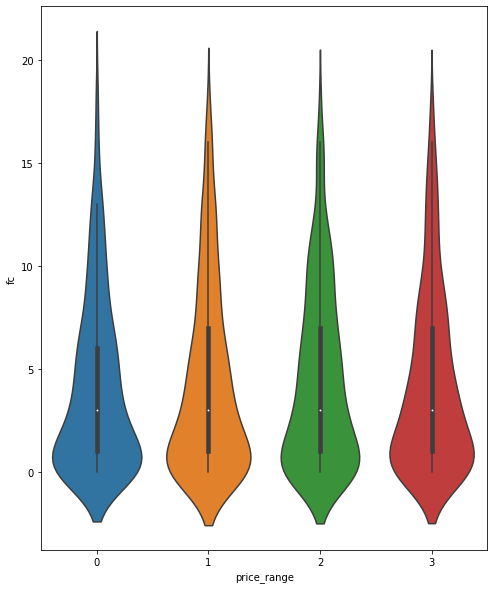

In [ ]:
ax = plt.figure(figsize = (8,10))
sns.violinplot(x = 'price_range', y = 'fc', data = df);

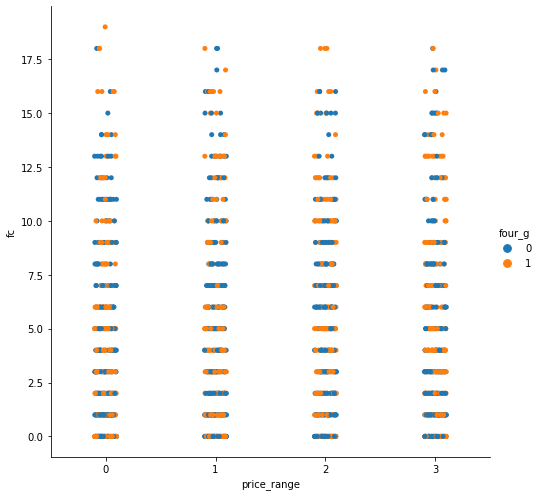

In [ ]:
sns.catplot(x = 'price_range', y = 'fc',hue = 'four_g', data = df, aspect = 1, height = 7);

### int_memory

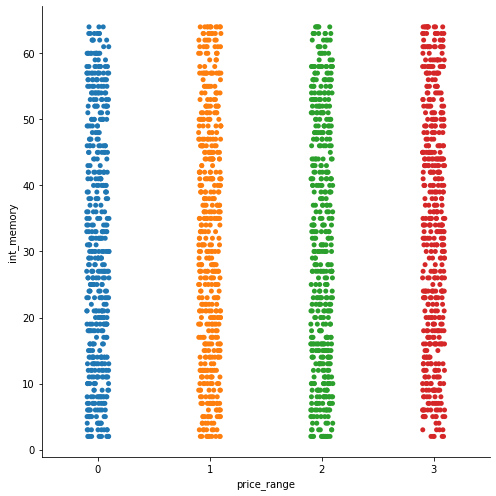

In [ ]:
sns.catplot(x = 'price_range', y ='int_memory', data = df, aspect = 1, height = 7);

### wifi

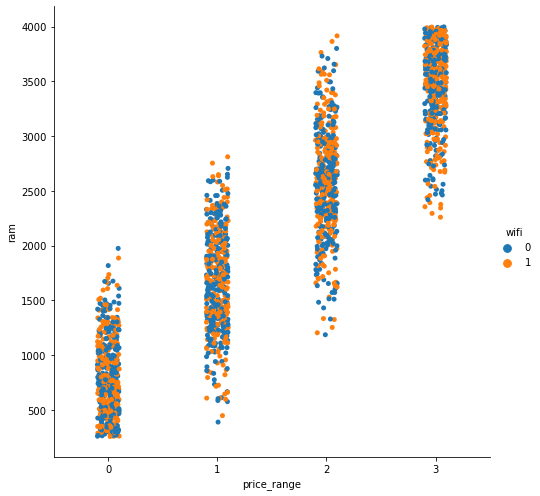

In [ ]:
sns.catplot(y = 'ram',x = 'price_range', hue = 'wifi',data = df, height = 7, aspect = 1);

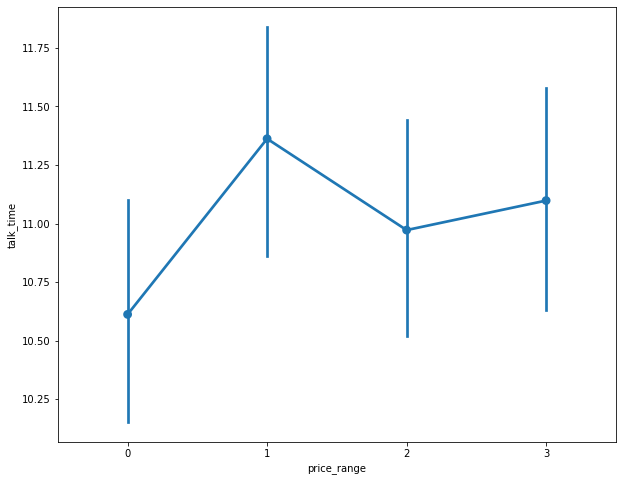

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.pointplot(y = "talk_time", x = "price_range", data = df);

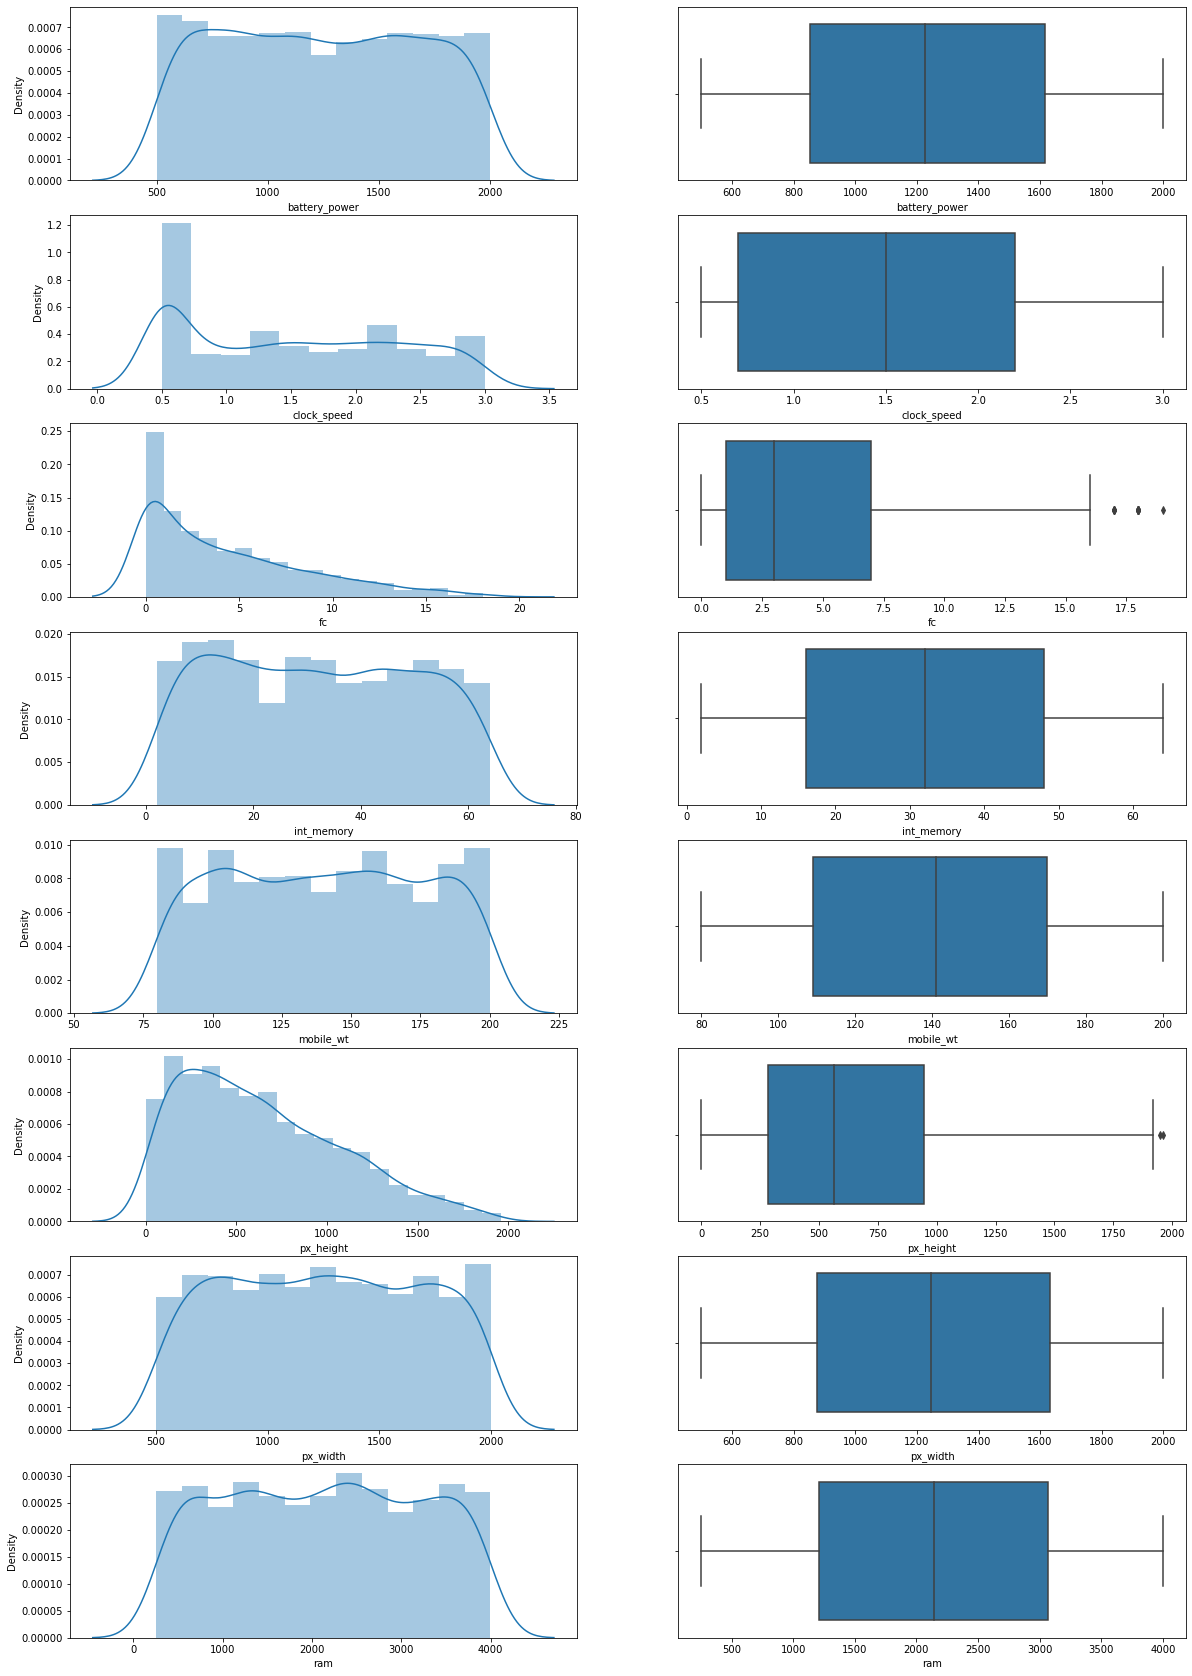

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,30))
plt.subplot(8,2,1)
sns.distplot(df['battery_power'])
plt.subplot(8,2,2)
sns.boxplot(df['battery_power'])
plt.subplot(8,2,3)
sns.distplot(df['clock_speed'])
plt.subplot(8,2,4)
sns.boxplot(df['clock_speed'])
plt.subplot(8,2,5)
sns.distplot(df['fc'])
plt.subplot(8,2,6)
sns.boxplot(df['fc'])
plt.subplot(8,2,7)
sns.distplot(df['int_memory'])
plt.subplot(8,2,8)
sns.boxplot(df['int_memory'])
plt.subplot(8,2,9)
sns.distplot(df['mobile_wt'])
plt.subplot(8,2,10)
sns.boxplot(df['mobile_wt'])
plt.subplot(8,2,11)
sns.distplot(df['px_height'])
plt.subplot(8,2,12)
sns.boxplot(df['px_height'])
plt.subplot(8,2,13)
sns.distplot(df['px_width'])
plt.subplot(8,2,14)
sns.boxplot(df['px_width'])
plt.subplot(8,2,15)
sns.distplot(df['ram'])
plt.subplot(8,2,16)
sns.boxplot(df['ram'])
plt.show()

## Finding IQR

In [ ]:
percentile25 = df['price_range'].quantile(0.25)
print(percentile25)
percentile75 = df['price_range'].quantile(0.75)
print(percentile75)

0.75
2.25


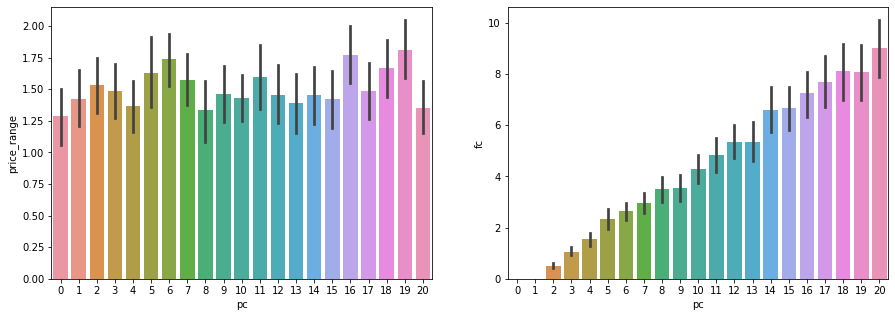

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='pc', y='price_range', data=df, ax=ax[0])
sns.barplot(x='pc', y='fc', data=df, ax=ax[1])
plt.show()

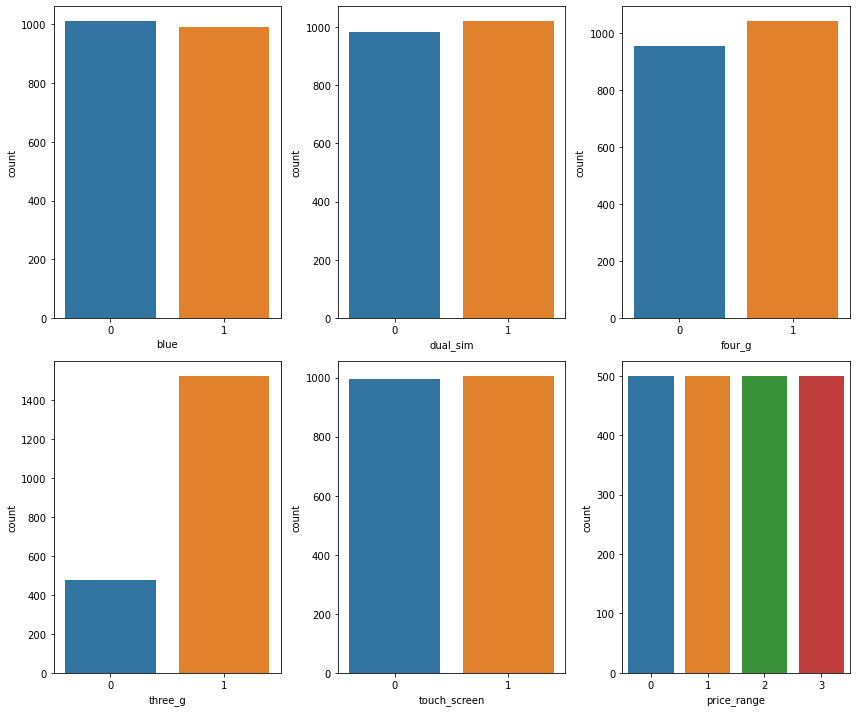

In [ ]:
plt.figure(figsize=(12,10))
col = ['blue','dual_sim','four_g','three_g','touch_screen','price_range']
c = 1
for i in col:
    if c < 7:
        plt.subplot(2,3,c)
        sns.countplot(x = i,data =df)
        plt.xlabel(i)
    c += 1
    plt.tight_layout()

<Figure size 864x720 with 0 Axes>

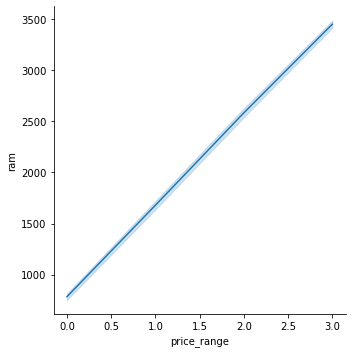

In [ ]:
plt.figure(figsize=(12,10))
sns.relplot(x = 'price_range',y = 'ram',data = df,kind = 'line')

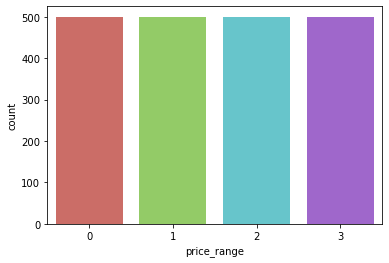

In [ ]:
sns.countplot(x = 'price_range',data=df,palette = 'hls')
plt.show()

In [ ]:
price = df.groupby('price_range').sum().sort_values('ram', ascending=False)
price.reset_index(inplace=True)

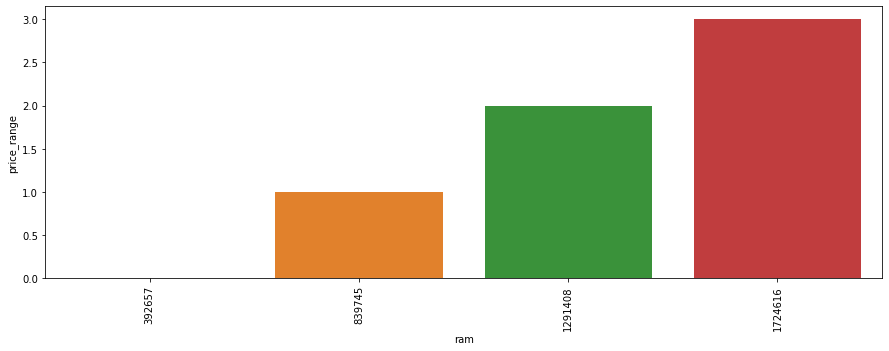

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='ram', y='price_range', data=price);
plt.xticks(rotation=90)
plt.show()

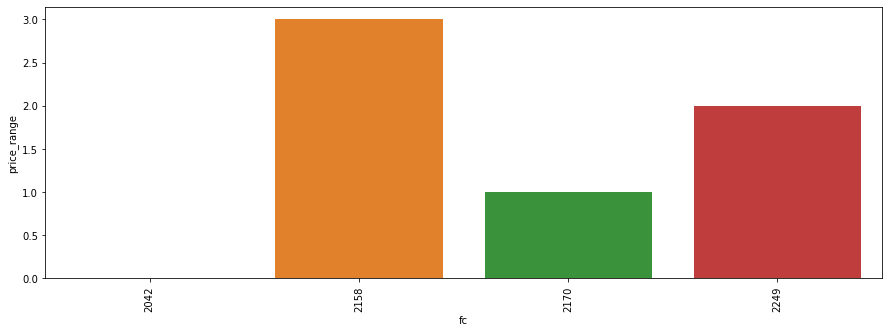

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
price = price.sort_values('price_range', ascending=False)
sns.barplot(x='fc', y='price_range', data=price);
plt.xticks(rotation=90)
plt.show()

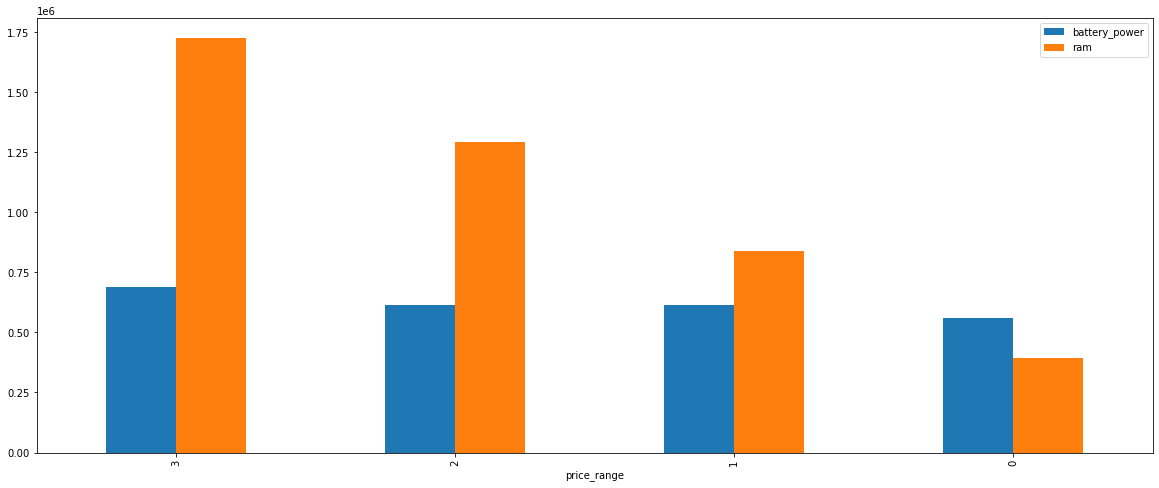

In [ ]:
price= df.groupby(['price_range'])[['battery_power', 'ram']].sum()
price.sort_values("ram", ascending=False).plot(kind = 'bar', figsize = (20,8))
plt.show()


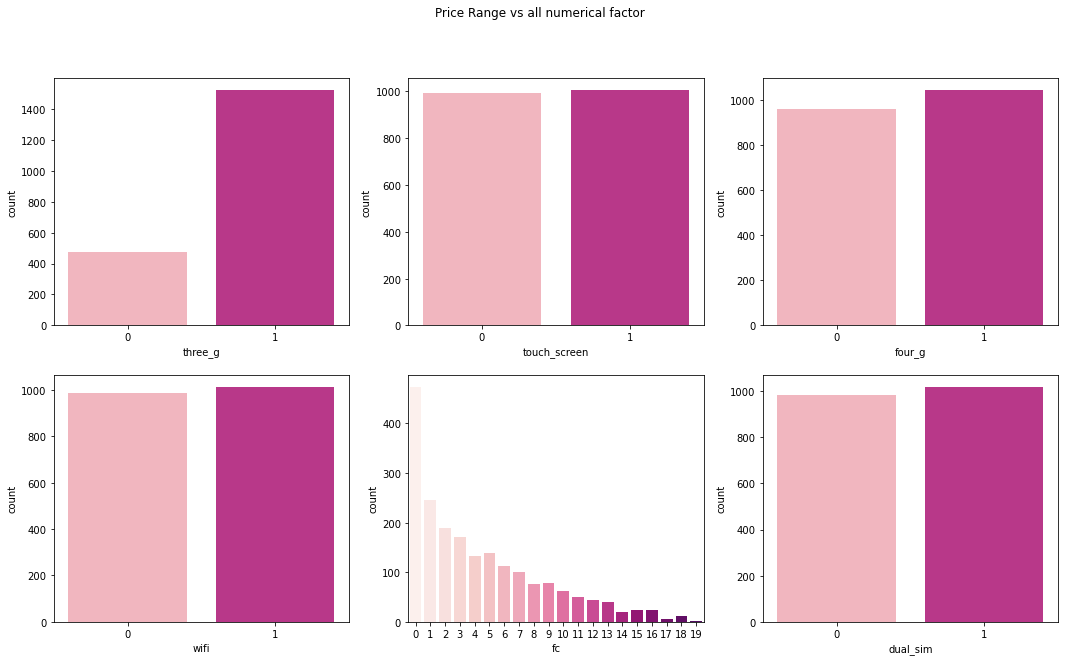

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Price Range vs all numerical factor')
sns.countplot(ax=axes[0, 0], data=df, x='three_g',palette='RdPu')
sns.countplot(ax=axes[0, 1], data=df, x='touch_screen',palette='RdPu')
sns.countplot(ax=axes[0, 2], data=df, x='four_g',palette='RdPu')
sns.countplot(ax=axes[1, 0], data=df, x='wifi',palette='RdPu')
sns.countplot(ax=axes[1,1],data = df, x ='fc' ,palette='RdPu')
sns.countplot(ax=axes[1,2],data = df, x ='dual_sim',palette='RdPu' )
plt.show()

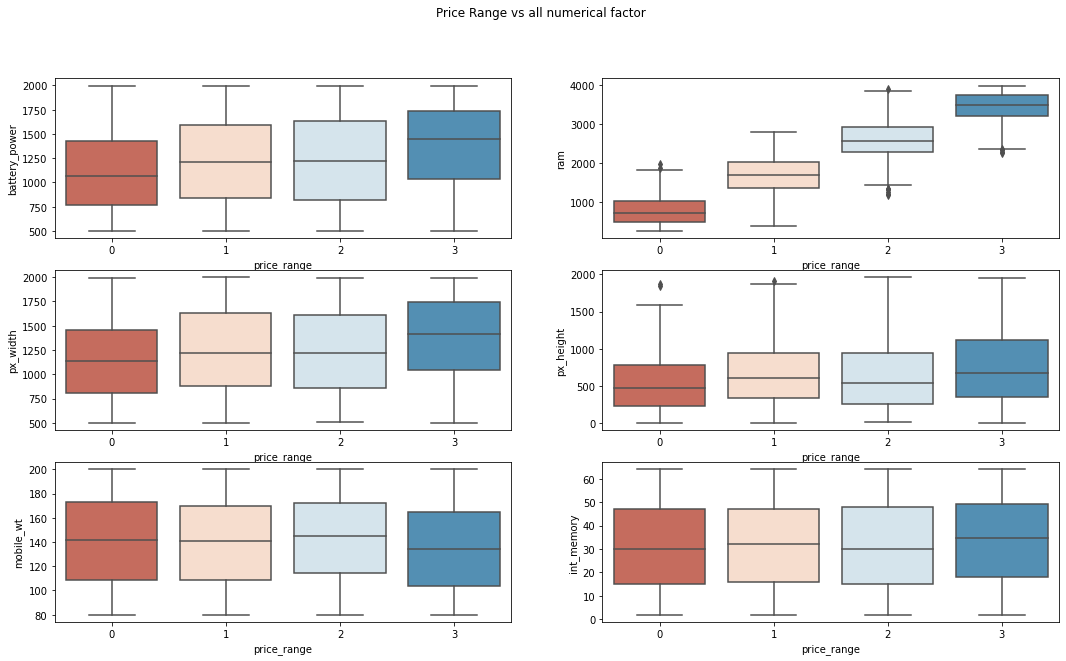

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

fig.suptitle('Price Range vs all numerical factor')

sns.boxplot(ax=axes[0, 0], data=df, x='price_range', y='battery_power',palette = "RdBu")
sns.boxplot(ax=axes[0, 1], data=df, x='price_range', y='ram',palette = "RdBu")
sns.boxplot(ax=axes[1, 0], data=df, x='price_range', y='px_width',palette = "RdBu")
sns.boxplot(ax=axes[1, 1], data=df, x='price_range', y='px_height',palette = "RdBu")
sns.boxplot(ax=axes[2,0],data=df,x='price_range',y='mobile_wt',palette = "RdBu")
sns.boxplot(ax=axes[2,1],data=df,x='price_range',y='int_memory',palette = "RdBu")
plt.show()